<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Random Forest and XGboost <br>
<font color=696880 size=4>
    Bahar Oveisgharan (bahar.oveis.2000@gmail.com) <br>
    Ghazal Farahani (farahaniqazal@gmail.com)

____


### Full Name : Sajede Fadaei


### Student Number : 400211513


### Breasr Cancer
Most of us know someone who struggled with breast cancer, or at least heard about the struggles facing patients who are fighting against breast cancer.The most important part of a process of clinical decision-making in patients with cancers, in general, is the accurate estimation of prognosis and survival duration. Breast cancer patients with the same stage of the disease and the same clinical characteristics can have different treatment responses and overall survival.
In this practical assignment, you are going to train a Random Forest and XGBoost model on <code>breast_cancer.csv</code> dataset.

Import all the libraries you may need here

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn import metrics
from scipy.stats import normaltest, skew
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.cluster import KMeans
from IPython.display import set_matplotlib_formats 
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[2]]
three_colors = [ sns.color_palette(color)[4],sns.color_palette(color)[3], sns.color_palette(color)[1]]

#### Loading the Data

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.rename(columns = {'Unnamed: 0' :'pid'} , inplace = True)
df.head()

,pid,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
0,0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,10.0,5.697687,6.044,IDC,Negative,1,ER-/HER2-,22.0,2.0,1
1,1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0.0,2.000000,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0,1
2,2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,1.0,2.000000,4.030,IDC,Positive,0,NaN,15.0,2.0,0
3,3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,3.0,1.000000,4.050,MDLC,Positive,1,NaN,25.0,2.0,1
4,4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,8.0,2.000000,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0


### Data Exploration
#### Let's start off by exploring the files we just imported. it's not necessary to do any visualization just a statistical summary of the data would be enough. split your data to train and test.

In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 28 columns


In [4]:
df.describe()

,pid,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,radio_therapy,tumor_size,tumor_stage,overall_survival
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,951.500000,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,0.597164,26.238726,1.750535,0.420693
std,549.781775,12.978711,0.405971,1.228615,0.638185,0.486343,4.079993,4.010503,1.144492,0.490597,15.081097,0.539889,0.493800
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,475.750000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,0.000000,17.000000,1.000000,0.000000
50%,951.500000,61.770000,0.000000,3.000000,2.415939,1.000000,0.000000,5.000000,4.042000,1.000000,23.000000,1.750535,0.000000
75%,1427.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,1.000000,30.000000,2.000000,1.000000
max,1903.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,1.000000,182.000000,4.000000,1.000000


In [5]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent =100* (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(14)

,Total_NaN,Percent_Nan
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
cellularity,54,2.836134
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
cancer_type_detailed,15,0.787815
oncotree_code,15,0.787815
tumor_other_histologic_subtype,15,0.787815
pid,0,0.000000
tumor_stage,0,0.000000


In [6]:
df.columns.tolist()

['pid',
 'age_at_diagnosis',
 'type_of_breast_surgery',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'oncotree_code',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'overall_survival']

Feature correlation with survival and death

In [7]:
corr = pd.pivot_table(df, columns=['overall_survival'])
survival_corr = corr.iloc[:,1].sort_values(ascending=False).head(10)
survival_corr

pid                              871.780275
age_at_diagnosis                  56.463408
tumor_size                        23.345370
mutation_count                     5.336992
nottingham_prognostic_index        3.847730
cohort                             2.428215
neoplasm_histologic_grade          2.352248
tumor_stage                        1.647443
lymph_nodes_examined_positive      1.214732
radio_therapy                      0.661673
Name: 1, dtype: float64

<AxesSubplot: xlabel='overall_survival'>

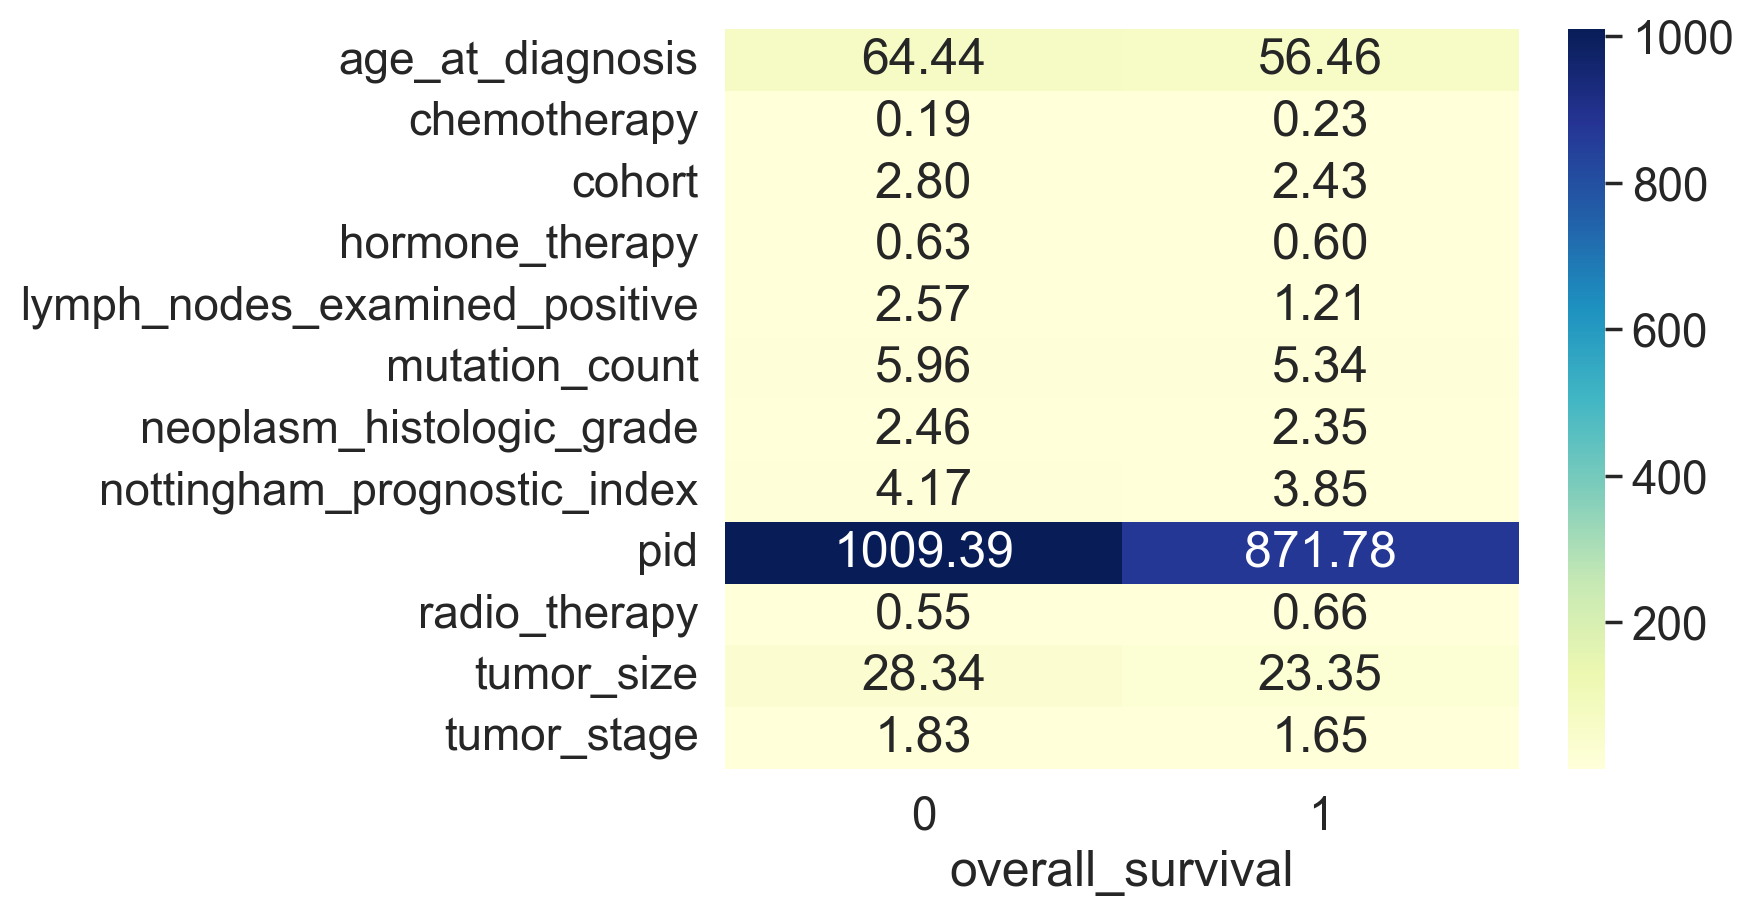

In [8]:
sns.heatmap(corr, cmap = "YlGnBu", annot=True, fmt=".2f")

In [9]:
print(df.describe())

               pid  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean    951.500000         61.087054      0.207983     2.643908   
std     549.781775         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     475.750000         51.375000      0.000000     1.000000   
50%     951.500000         61.770000      0.000000     3.000000   
75%    1427.250000         70.592500      0.000000     3.000000   
max    1903.000000         96.290000      1.000000     5.000000   

       neoplasm_histologic_grade  hormone_therapy  \
count                1904.000000      1904.000000   
mean                    2.415939         0.616597   
std                     0.638185         0.486343   
min                     1.000000         0.000000   
25%                     2.000000         0.000000   
50%                     2.415939         1.000000   
75%                     3

Showing effectivness of each type of treatment and the correlation between them.


1.   chemotherapy 
2.   hormone therapy
3.   radio therapy
4.   surgery (mastectomy or breast conserving)

In [10]:
pd.Series.unique(df['type_of_breast_surgery'])

array(['MASTECTOMY', 'BREAST CONSERVING', nan], dtype=object)

In [11]:
treatments = ['chemotherapy' , 'hormone_therapy','radio_therapy', 'type_of_breast_surgery']
treatments_df = df[treatments]
treatments_df["type_of_breast_surgery"] = treatments_df["type_of_breast_surgery"].apply(lambda x: 1 if "BREAST CONSERVING" in str(x) else 0)

<AxesSubplot: >

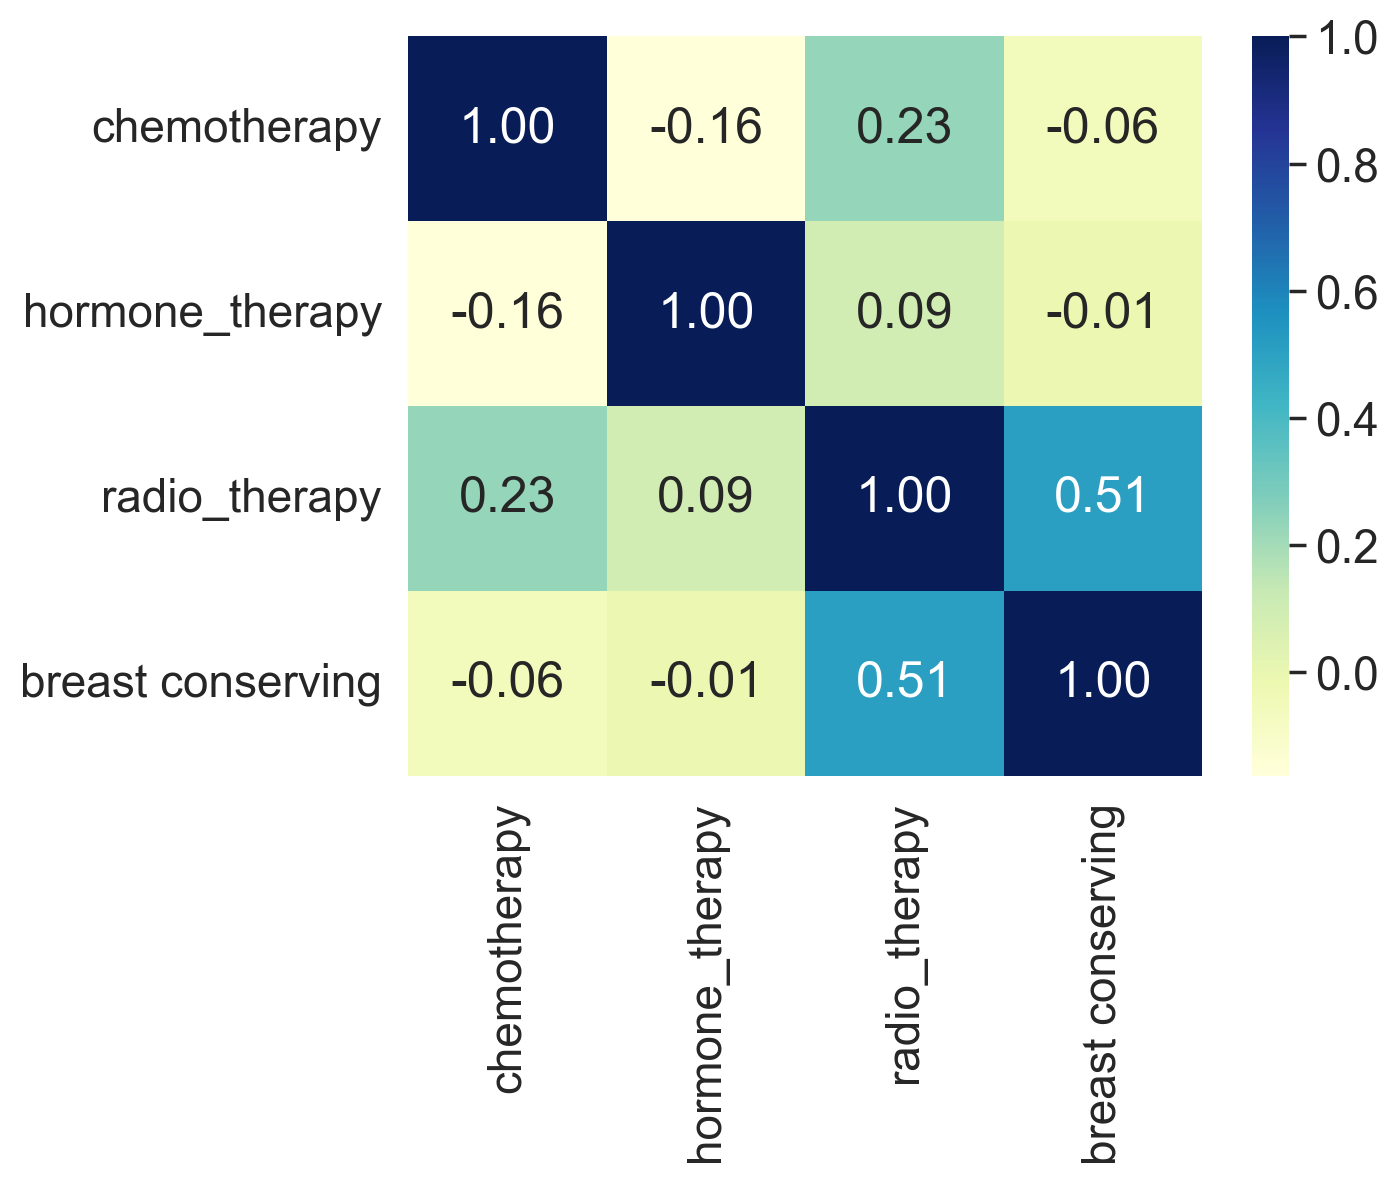

In [12]:
treatments_df.rename(columns={"type_of_breast_surgery": "breast conserving"}, inplace=True)
treatments_df_corr = treatments_df.corr() 
sns.heatmap(treatments_df_corr, cmap = "YlGnBu", annot=True, fmt=".2f")


Lets explore the effectivness of combined treatments

In [13]:
treatments_survival_rate = pd.pivot_table(df, columns = treatments,  values = 'overall_survival').mean().sort_values(ascending=False)

In [14]:
treatments_survival_rate

chemotherapy  hormone_therapy  radio_therapy  type_of_breast_surgery
1             0                1              BREAST CONSERVING         0.626866
              1                1              BREAST CONSERVING         0.596774
0             0                1              BREAST CONSERVING         0.563452
              1                1              BREAST CONSERVING         0.507003
                               0              BREAST CONSERVING         0.500000
1             1                1              MASTECTOMY                0.500000
0             0                0              BREAST CONSERVING         0.481481
1             0                0              MASTECTOMY                0.410256
0             0                0              MASTECTOMY                0.366142
1             0                1              MASTECTOMY                0.333333
              1                0              MASTECTOMY                0.333333
0             1                0        

### Data Preparation
#### Creating two custom transformers to put on our pipeline:
* To split the data into categorical and numerical features and
* To preprocess the categorical features. 
* Create the X feature matrix and the y target vector.
* split the data.

In [15]:
df1 = df.drop(columns=['pid', 'cancer_type_detailed', 'cohort'])
df2 = df1[df1['her2_status_measured_by_snp6'] != 'UNDEF']

In [16]:
df1.shape , df2.shape

((1904, 25), (1900, 25))

In [17]:
df2['er_status_measured_by_ihc'] = df2['er_status_measured_by_ihc'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df2['her2_status'] = df2['her2_status'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df2['inferred_menopausal_state'] = df2['inferred_menopausal_state'].apply(lambda x: 1 if "Post" in str(x) else 0)
df2['primary_tumor_laterality'] = df2['primary_tumor_laterality'].apply(lambda x: 1 if "Left" in str(x) else 0)
df2['pr_status'] = df2['pr_status'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df2['er_status'] = df2['er_status'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df2['type_of_breast_surgery'] = df2['type_of_breast_surgery'].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)

In [18]:
df2.columns

Index(['age_at_diagnosis', 'type_of_breast_surgery', 'cellularity',
       'chemotherapy', 'pam50_+_claudin-low_subtype',
       'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'overall_survival'],
      dtype='object')

In [19]:
#Change columns into dummy variables
dummyList = ['cellularity',
             'pam50_+_claudin-low_subtype',
             'neoplasm_histologic_grade',
             'tumor_other_histologic_subtype',
             'integrative_cluster',
             'oncotree_code',
             'her2_status_measured_by_snp6',
             '3-gene_classifier_subtype',
            ]
df3 = pd.get_dummies(df2, columns=dummyList)

In [20]:
def standard_scaler(df):
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df


y = df3["overall_survival"]
X = df3.drop(columns=["overall_survival"])

cdf = df[['lymph_nodes_examined_positive', 
                  'age_at_diagnosis', 
                  'mutation_count', 
                  'tumor_size', 
                  'tumor_stage', 
                  'neoplasm_histologic_grade', 
                  'cohort', 
                  'nottingham_prognostic_index',
                  'overall_survival']]

X_cl = standard_scaler(cdf.drop(columns =  ["overall_survival"]))
y_cl =cdf ["overall_survival"]

In [21]:
X.isnull().sum() , X_cl.shape, y.shape , y_cl.shape

(age_at_diagnosis                                   0
 type_of_breast_surgery                             0
 chemotherapy                                       0
 er_status_measured_by_ihc                          0
 er_status                                          0
                                                   ..
 her2_status_measured_by_snp6_NEUTRAL               0
 3-gene_classifier_subtype_ER+/HER2- High Prolif    0
 3-gene_classifier_subtype_ER+/HER2- Low Prolif     0
 3-gene_classifier_subtype_ER-/HER2-                0
 3-gene_classifier_subtype_HER2+                    0
 Length: 62, dtype: int64,
 (1904, 8),
 (1900,),
 (1904,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size = 0.20)

In [23]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)

    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # K Neighbors Classifier model
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    # Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    # Decision Tree
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    # Random Forest Classifier
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    # Extra Trees Classifier
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    # AdaBoost Classifier
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    # SVC Classifier
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
    #bar chart of accuracy scores
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[1], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[4], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.6, color="red", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    
# a function that takes a dataframe and plots histograms for all columns 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3))
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10))
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column].dropna(), color= "blue" )
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) 
    plt.show()
    
    
# a function that takes a dataframe and plots barplot for all columns 
def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3))
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10))
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.countplot(dataframe[column].dropna(), color= "blue", ax=ax[i], hue=dataframe['eventdeath'])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i])
    plt.show() 

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5710526315789474

In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train_cl, y_train_cl)
y_pred = clf.predict(X_test_cl)
accuracy_score(y_test_cl, y_pred)

0.6115485564304461

# Implementing two different models

## Random Forest

### train the model

In [26]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.


In [27]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7157894736842105


### Hyperparameter tuning :
#### Randomized Search Cross Validation and Grid Search Cross Validation
report best hyperparameters in each part.

In [28]:
def random_forest_gridsearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Random Forest Classifier Model:' + END)
    rf_params = {
        'max_features':[2, 3, 5, 7, 8],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train


def extra_trees_gridsearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Extra Trees Model:' + END)
      
    rf_params = {
        'max_depth': [1, 2, 3, 4, 5, 8],
    }

    extra_trees = ExtraTreesClassifier(n_estimators=100)    
    gs = GridSearchCV(extra_trees, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train

def RF_ET_gridsearch (X_train, X_test, y_train, y_test, kfold):
    rf_gs_best_estimator, rf_pred, rf_test, rf_train = random_forest_gridsearch(X_train, X_test, y_train, y_test, kfold)
    et_gs_best_estimator, et_pred, et_test, et_train = extra_trees_gridsearch(X_train, X_test, y_train, y_test, kfold)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(13,6))

    fig.suptitle("Random Forest and Extra Trees with Grid Search", fontsize=16)

    inds = range(1,3)
    labels = ["Random Forest", "Extra Trees" ]
    scores_all = [rf_train, et_train]
    scores_predictive = [rf_test, et_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette("Spectral")[1], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set") #
    ax1.bar(inds, scores_predictive, color=sns.color_palette("Spectral")[4], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.6, color="red", linestyle="--")
    ax1.set_title("Accuracy scores", fontsize=17)
    ax1.set_xticks(range(1,3))
    ax1.set_xticklabels(labels, size=14)
    ax1.legend()

    labels = ["Random Forest", "Extra Trees" ]
    for label, pred in zip(labels, [rf_pred, et_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 14})
    ax2.set_title("Roc curve", fontsize=17)

    plt.show()

In [29]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.65789474 0.68421053 0.67105263 0.68092105 0.65789474]
CV Standard Deviation:  0.011087039175232039

CV Mean score:  0.6703947368421053
Train score:    1.0
Test score:     0.7

Confusion Matrix: 
[[181  43]
 [ 71  85]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       224
           1       0.66      0.54      0.60       156

    accuracy                           0.70       380
   macro avg       0.69      0.68      0.68       380
weighted avg       0.70      0.70      0.69       380


Grid

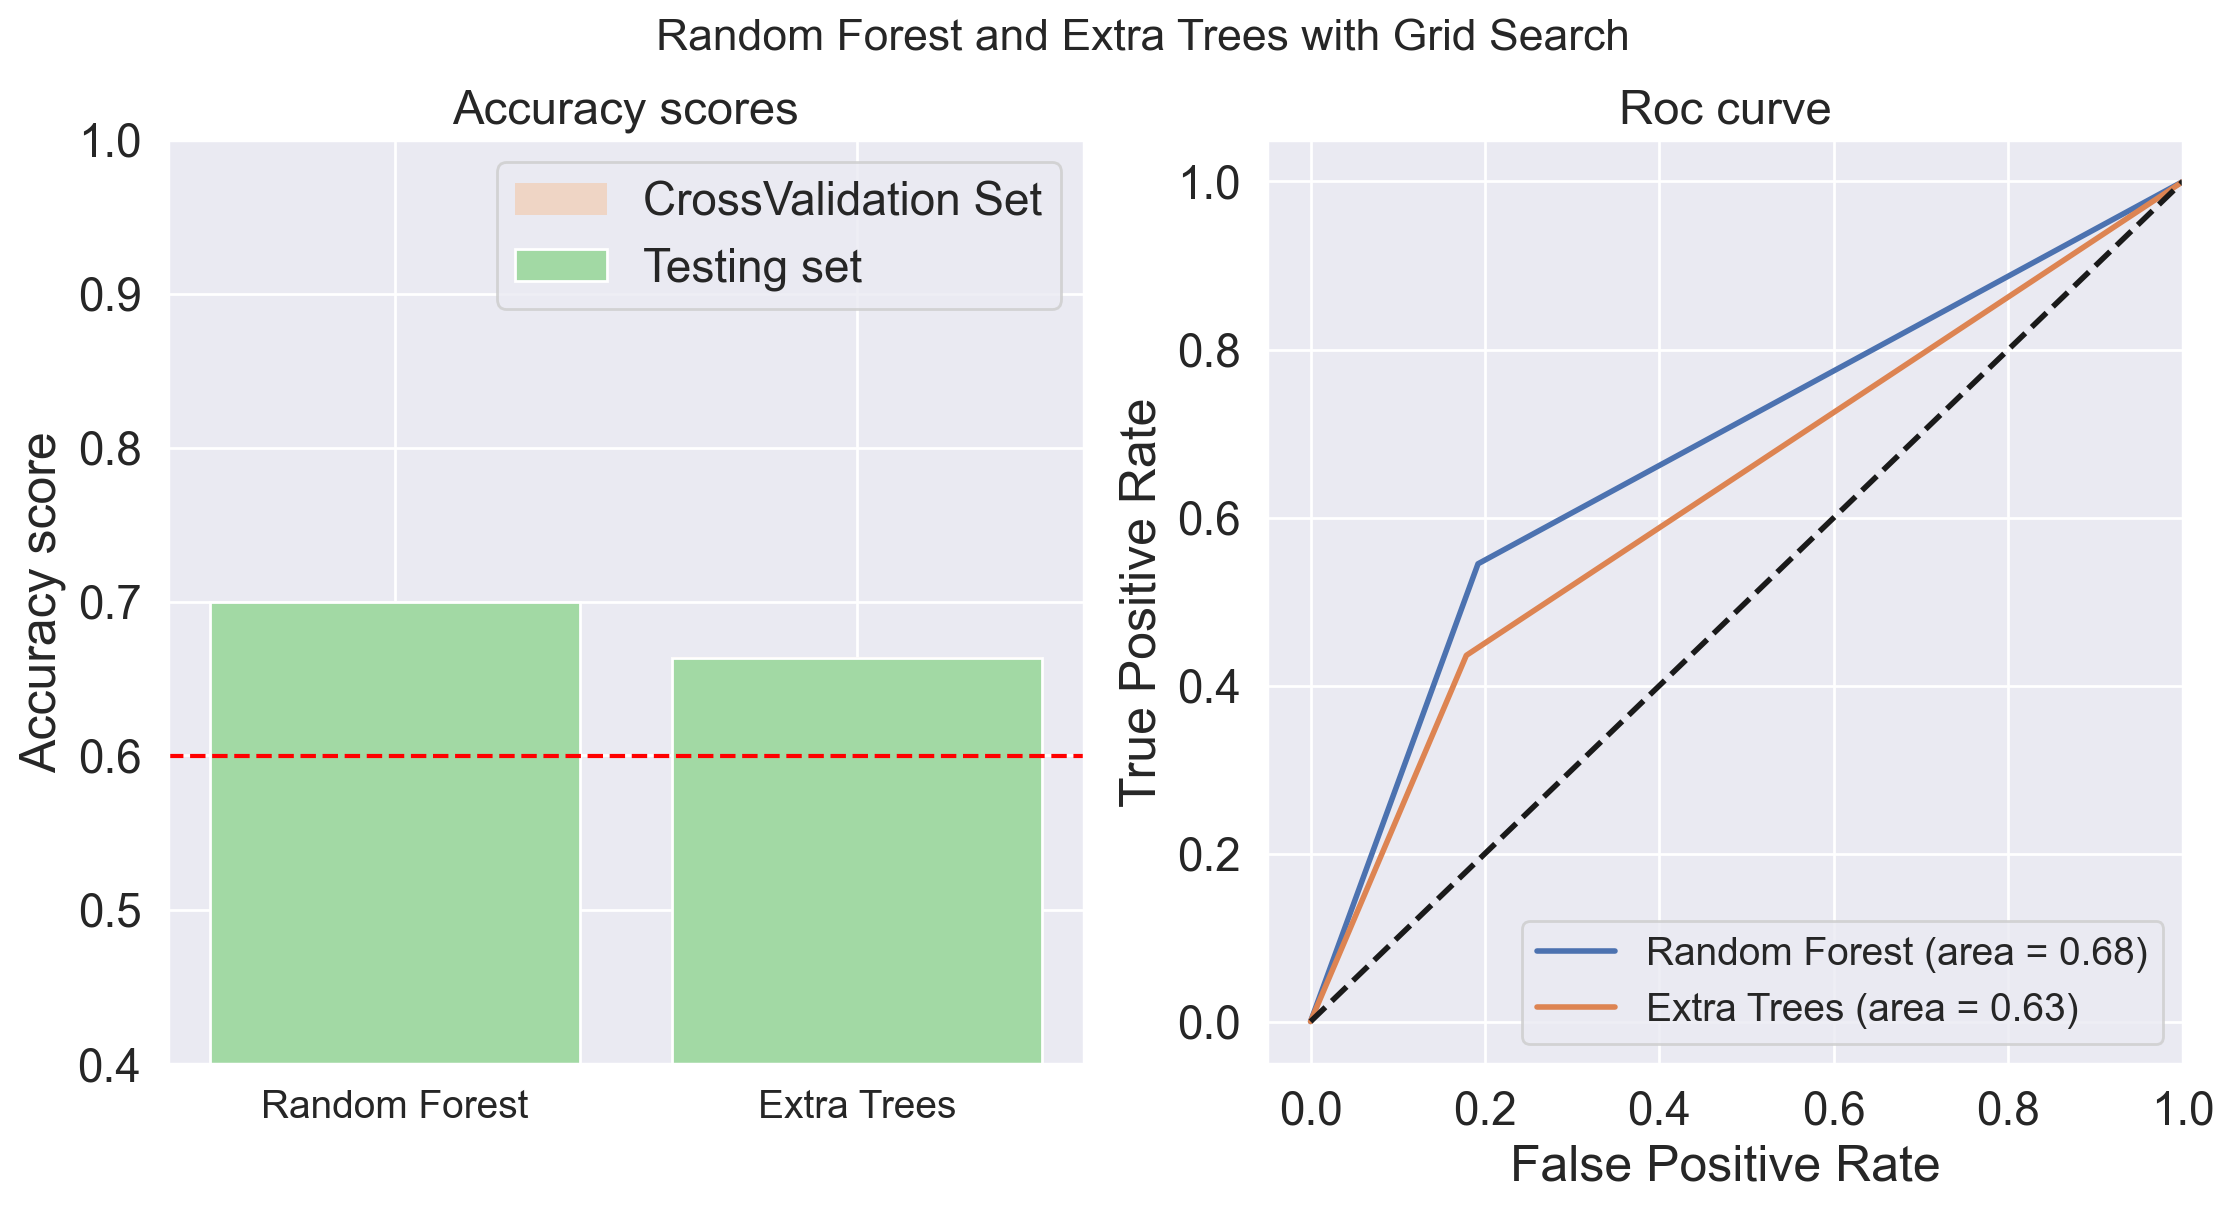

In [30]:
RF_ET_gridsearch (X_train, X_test, y_train, y_test, kfold)

### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. implement it and compare the results.

## XGBoost
### Train the model

### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.



In [31]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

clinical_xgb1_pred, clinical_xgb1_test_score, clinical_xgb1_cv_score = model_metrics(xgb1, kfold, X_train_cl, X_test_cl, y_train_cl, y_test_cl)

CV scores:  [0.65245902 0.66229508 0.6295082  0.67434211 0.68092105]
CV Standard Deviation:  0.018084387132519395

CV Mean score:  0.6599050905953409
Train score:    1.0
Test score:     0.6614173228346457

Confusion Matrix: 
[[167  50]
 [ 79  85]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       217
           1       0.63      0.52      0.57       164

    accuracy                           0.66       381
   macro avg       0.65      0.64      0.64       381
weighted avg       0.66      0.66      0.66       381



In [32]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1_pred, xgb1_test_score, xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.6875     0.6875     0.67434211 0.66776316 0.65460526]
CV Standard Deviation:  0.01248267497434888

CV Mean score:  0.6743421052631579
Train score:    1.0
Test score:     0.6684210526315789

Confusion Matrix: 
[[165  59]
 [ 67  89]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       224
           1       0.60      0.57      0.59       156

    accuracy                           0.67       380
   macro avg       0.66      0.65      0.65       380
weighted avg       0.67      0.67      0.67       380



XGBoost preformed very well combared to traditional basic models, and the best model was the one that was trained with all of the features combined with accuracy of  and AUC of 

### Plot the results

### Hyperparameter tuning: Grid Search and Cross validation
* create a default XGBoost classifier.
* create the Kfold object. You can use tratifiedKFold from sklearn.model_selection.
* create the grid search object. You can use RandomizedSearchCV from sklearn.model_selection.
* fit grid search.

### Assessing model performance using the best model from grid search
#### Print Train Accuracy, Test Accuracy and Classification Report.

### Create the feature importances plot, plot a decision tree from the booster.

### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. You can implement your model and compare the results.

### XGBoost: Final try to increase the predictive score
After tuning the hyperparamenters, these are the final parameters:

max_depth: 5
min_child_weight: 3, 1
gamma: 0

In [33]:
def model_visualization (labels, scores_all, scores_predictive, pred, title, inds, y_test_sets):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(13,6))

    fig.suptitle(title, fontsize=16)
    #bar chart of accuracy scores

    ax1.bar(inds, scores_all, color=sns.color_palette(color)[1], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set") #
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[4], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.6, color="red", linestyle="--")
    ax1.axhline(0.7758346581875993, color="red", linestyle="--")
    ax1.set_title("Accuracy scores", fontsize=17)
    ax1.set_xticks(inds)
    ax1.set_xticklabels(labels, size=14)
    ax1.legend()
    


    for label, pred, y_test in zip(labels, pred, y_test_sets):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 14})
    ax2.set_title("Roc curve", fontsize=17)

    plt.show()

In [34]:
categorical_columns = cdf.select_dtypes(include=['object']).columns.tolist()
dummies_cdf = pd.get_dummies(cdf, columns= categorical_columns, dummy_na=True)

# data splitting
X = dummies_cdf.drop(['overall_survival'], axis=1)
y = dummies_cdf['overall_survival']

X_train, X_test, y_train, y_test_c = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [35]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

clinical_xgb1_pred_, clinical_xgb1_test_score, clinical_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test_c)

CV scores:  [0.62745098 0.65098039 0.67843137 0.6627451  0.61568627]
CV Standard Deviation:  0.022866478019001175

CV Mean score:  0.6470588235294118
Train score:    1.0
Test score:     0.6899841017488076

Confusion Matrix: 
[[275  89]
 [106 159]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       364
           1       0.64      0.60      0.62       265

    accuracy                           0.69       629
   macro avg       0.68      0.68      0.68       629
weighted avg       0.69      0.69      0.69       629



## Comparison between XGBoost and Random Forest Classifier

Compare the results from these two models. How Would you rate each method in terms of its performance? What's the difference between these models? explain.

I would suggest using XGBoost as it will, in most situations, provide higher accuracy and less overfitting than Random Forest.

## differences between Random Forest and XGBoost

<ol>
    <li><p>The decision trees in XGBoost are trained sequentially with adjustments made from the prior tree's error, whilst in Random Forest they are created in parallel and independently</p></li>
    <li><p>Random forest models are prone to overfitting, whilst XGBoost models are able to counter this by creating shallower trees</p></li>
    <li><p>XGBoost is a more complex model, which has many more parameters that can be optimised through parameter tuning</p></li>
    <li><p>Random Forest is more interpretable as it produces a set of decision trees which can be visualised</p></li>
    <li><p>XGBoost often works better with imbalanced datasets</p></li>
    <li><p>Random Forest is implemented in scikit-learn, whilst XGBoost is its own Python package</p></li>
</ol>
    

In [36]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
print('Baseline accuracy:' )
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

Baseline accuracy:
0    0.579307
1    0.420693
Name: overall_survival, dtype: float64



K Neighbors Classifier Model:
CV scores:  [0.63921569 0.67843137 0.70588235 0.69019608 0.64313725]
CV Standard Deviation:  0.026177755714946897

CV Mean score:  0.6713725490196079
Train score:    0.7074509803921568
Test score:     0.6883942766295708

Confusion Matrix: 
[[293  71]
 [125 140]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       364
           1       0.66      0.53      0.59       265

    accuracy                           0.69       629
   macro avg       0.68      0.67      0.67       629
weighted avg       0.69      0.69      0.68       629


Logistic Regression Model:
CV scores:  [0.65490196 0.70980392 0.70196078 0.65882353 0.64705882]
CV Standard Deviation:  0.026012743453767834

CV Mean score:  0.6745098039215686
Train score:    0.68
Test score:     0.6979332273449921

Confusion Matrix: 
[[296  68]
 [122 143]]
Classification Report:  
              precision    recall  f1-score   suppor

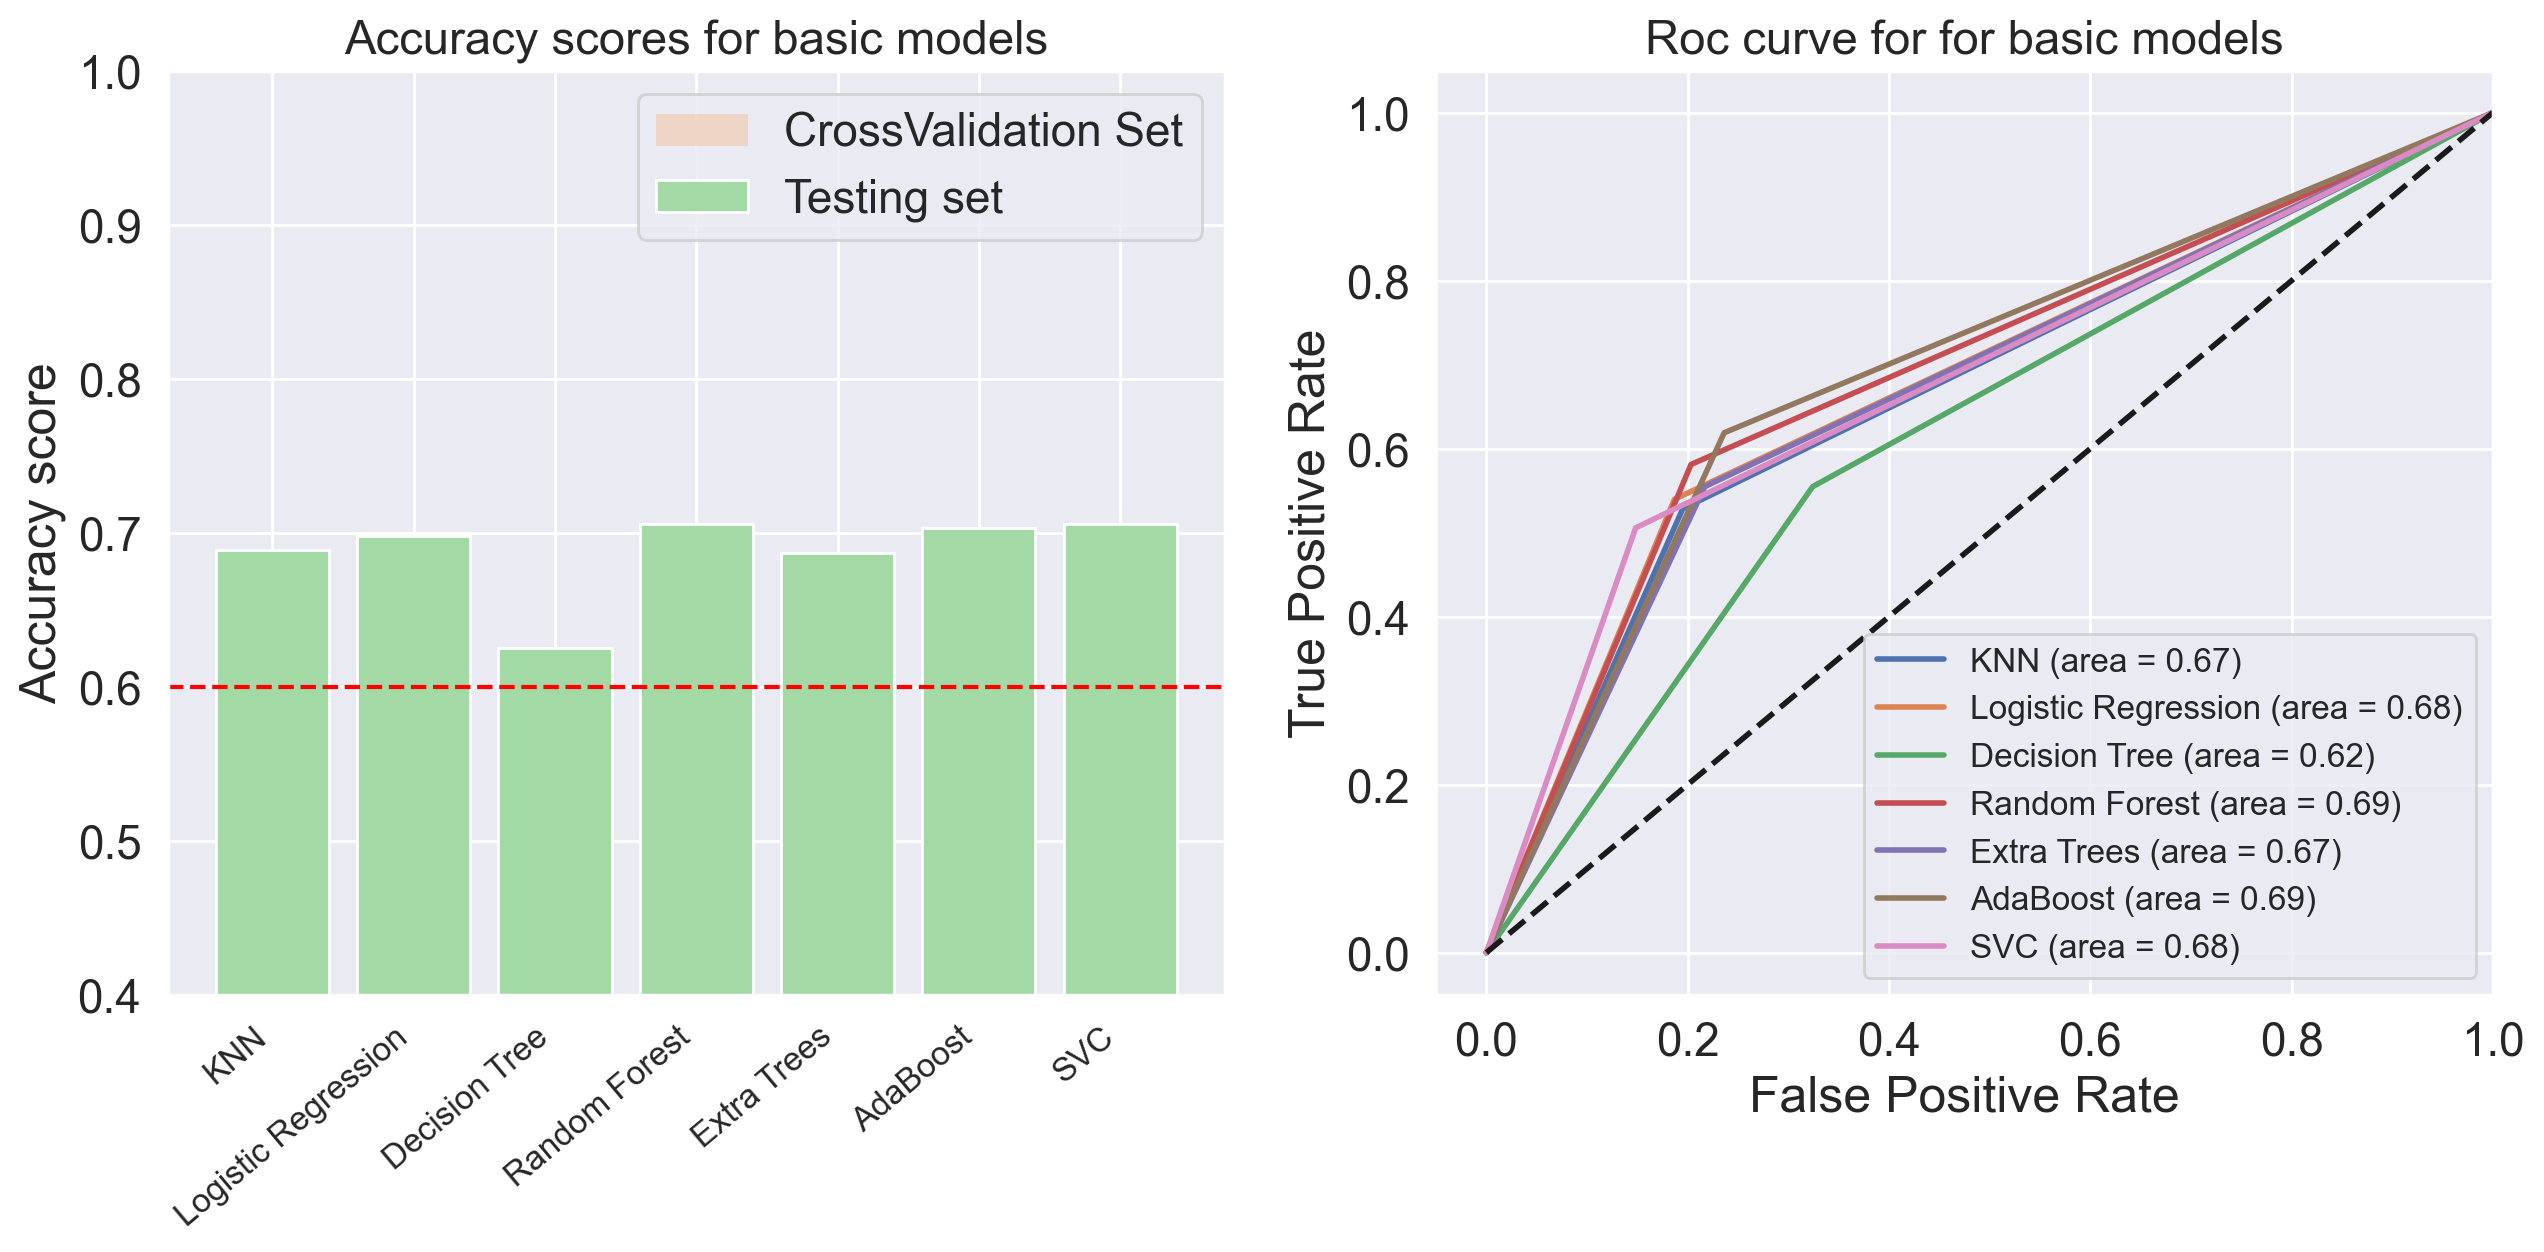

In [38]:
basic_classifiers( X_train, X_test, y_train, y_test_c, kfold)


K Neighbors Classifier Model:
CV scores:  [0.69180328 0.67540984 0.66885246 0.69078947 0.67763158]
CV Standard Deviation:  0.008973860485828156

CV Mean score:  0.6808973252804142
Train score:    0.7130663164806303
Test score:     0.6797900262467191

Confusion Matrix: 
[[178  39]
 [ 83  81]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       217
           1       0.68      0.49      0.57       164

    accuracy                           0.68       381
   macro avg       0.68      0.66      0.66       381
weighted avg       0.68      0.68      0.67       381


Logistic Regression Model:
CV scores:  [0.70819672 0.65901639 0.65901639 0.6875     0.68421053]
CV Standard Deviation:  0.01870191659333678

CV Mean score:  0.6795880069025021
Train score:    0.6848325673013789
Test score:     0.6692913385826772

Confusion Matrix: 
[[166  51]
 [ 75  89]]
Classification Report:  
              precision    recall  f1-s

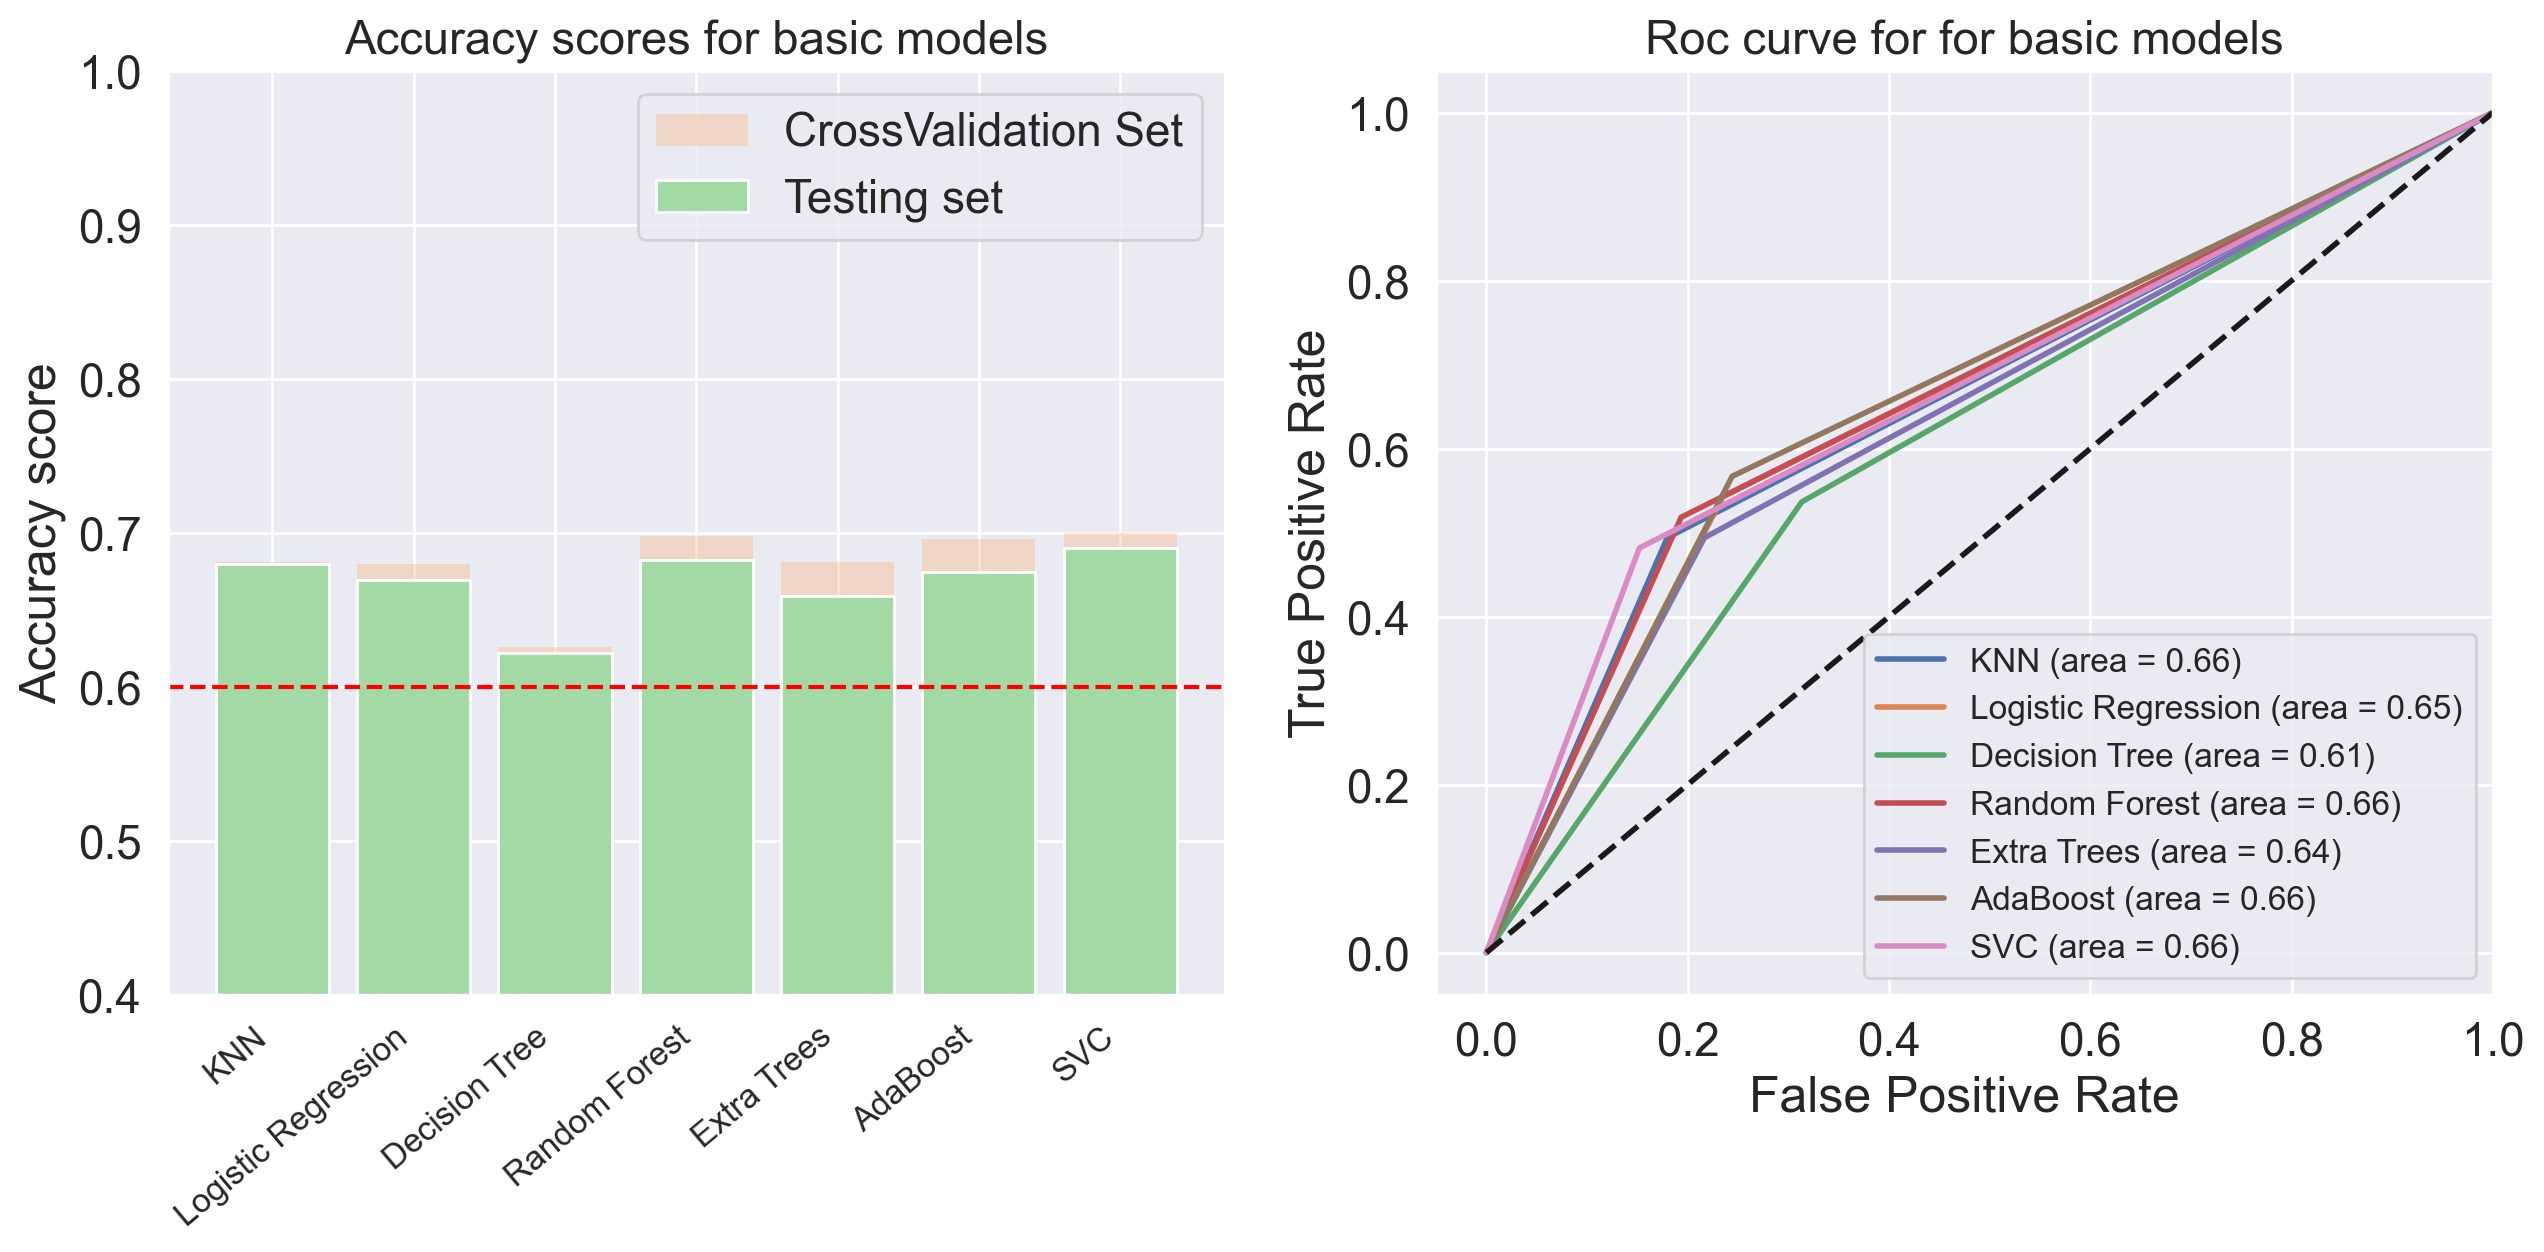

In [39]:
basic_classifiers( X_train_cl, X_test_cl, y_train_cl, y_test_cl, kfold)

If we train the models only with genetic data, we can see that the performance of almost every model is bad

Almost every model except decision tree preformed nearly as good as others with decision tree being dead last with 0.62 accuracy. unless we increase the sample size and/or the features so we can better test the models, there is no obviuse best choice